# Análise Exploratória de Dados

### **Metodologia CRISP - DM**

O projeto utilizou-se da metodologia CRISP-DM (Cross Industry Process Model for Data Mining) adaptada para projetos em Data Science - DS (Análise Exploratória de Dados, Machine Learning, Deep Learning, dentre outras aplicações). A referida metodologia baseia-se em 06 (seis) etapas, a saber: Entendimento do Negócio, Entendimento dos Dados, Preparação dos Dados, Construção dos Modelos, Avaliação e Implementação.

<img alt="Colaboratory logo" width="75%" src="https://raw.githubusercontent.com/consultantleonardoferreira/Projetos-em-Data-Science/master/crisphorizontal.png">

## 1-Entendendo o Negócio

A partir do início de 2020, o Covid-19 causou grandes abalos e preocupações pelo mundo todo. Se beneficiando do nosso estado avançado de globalização , seu método de transmissão via pequenas gotículas e pelo ar se mostraram extremamente eficientes. Este *data frame* traz dados sobre o início da propagação desse vírus e nós analisaremos isso para chegar à importantes observações. 



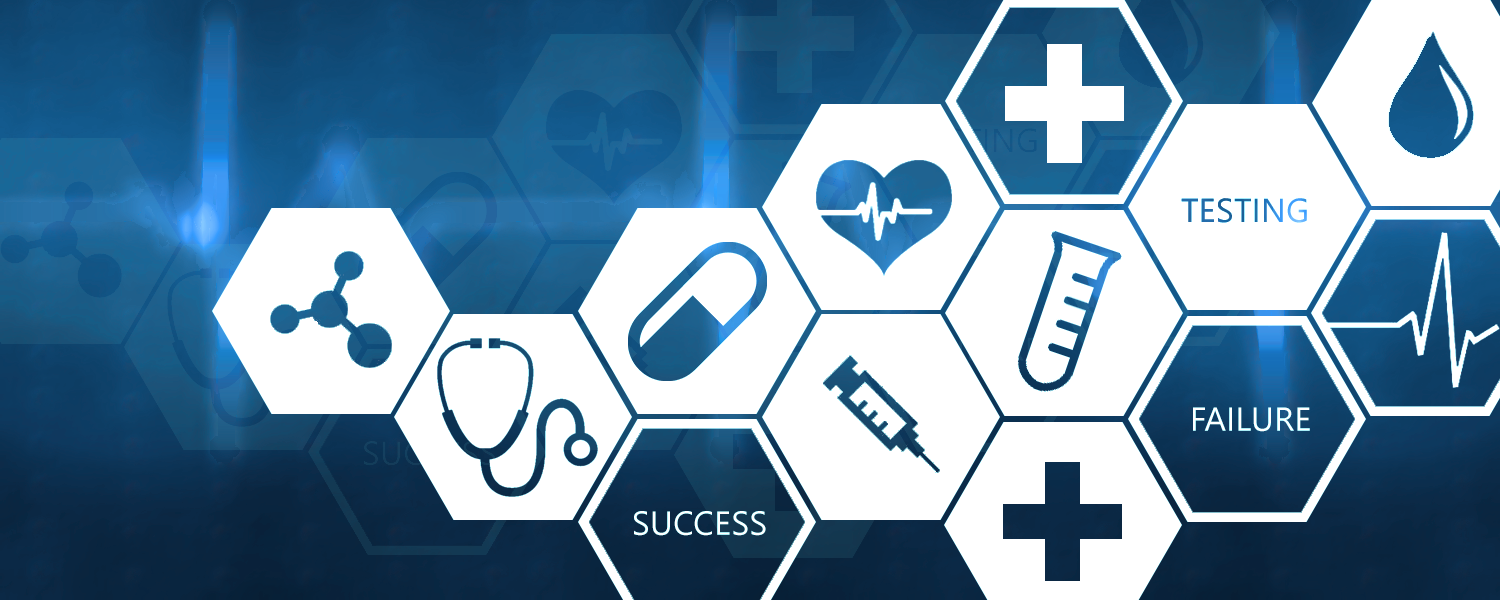

A missão em analisar este *data frame* é responder perguntas relativas à pandemia, estas sendo:

*   A partir de que dia todos os países foram afetados pelo Covid-19?
*   Maior crescimento de casos de um dia para o outro
*   Qual o maior número de mortes registradas?
*   Qual a média de mortes por dia?




Além disso, esta análise de dados será considerada um sucesso caso o tratamento dos dados seja devidamente executado e também suas projeções em gráficos.


## 2-Entendendo os dados




Nesse segmento, vamos focar em entender com o que estamos analisando. Para isso precisamos analisar o *data frame*.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.size'] = 18
sns.set_context('talk', font_scale=1.2);
%matplotlib inline

df = pd.read_csv('day_wise.csv')


Importação das bibliotecas necessárias do python para realizar a análise e posteriormente o tratamento dos dados; e do *data frame* em questão.

In [ ]:
df.shape



(188, 12)

Vimos assim, graças à linha de código acima, o escopo do *data frame* com que trabalharemos, pois agora sabemos suas dimensões; de 188 linhas e 12 colunas.

In [ ]:
display(df.dtypes)

Date                       object
Confirmed                   int64
Deaths                      int64
Recovered                   int64
Active                      int64
New cases                   int64
New deaths                  int64
New recovered               int64
Deaths / 100 Cases        float64
Recovered / 100 Cases     float64
Deaths / 100 Recovered    float64
No. of countries            int64
dtype: object

Mais informações retiradas , estas sendo os tipos de variáveis contidas no *data frame*. Já conseguimos reparar que todas as variáveis com a exceção de Date são numéricas.


In [ ]:
df.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [ ]:
df.tail()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187
187,2020-07-27,16480485,654036,9468087,6358362,228693,5415,174623,3.97,57.45,6.91,187


Vendo as 5 primeiras e 5 últimas linhas, podemos reparar que as datas não apenas estão registradas no modelo de ***ano/mês/dia***, como também podemos perceber que estão registrados em sequência desde o 22/01/2020 até o dia 27/7/2020. Para facilitar a leitura dos dados irei me referir as datas neste mesmo padrão.


In [ ]:
df = df.rename(columns={"Date" : "Data","Confirmed":"Confirmados","Deaths":"Mortes","Recovered":"Recuperados","Active":"Ativos",
                        "New cases":"Novos casos","New deaths":"Novas mortes","New recovered":"Novos recuperados","No. of countries":"Qtd países",
                        "Deaths / 100 Cases":"Mortes a cada 100 casos","Recovered / 100 Cases":"Recuperados a cada 100 casos","Deaths / 100 Recovered":"Mortes a cada 100 recuperados"})
df.head()

,Data,Confirmados,Mortes,Recuperados,Ativos,Novos casos,Novas mortes,Novos recuperados,Mortes a cada 100 casos,Recuperados a cada 100 casos,Mortes a cada 100 recuperados,Qtd países
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


Traduzi para o português o nome de várias colunas para melhor seguirmos com a análise.<br><br>
Um ponto importante que notei: Confirmados = Mortes + Recuperados + Ativos.<br><br>
Exemplo : os três primeiros dias<br><br>

01/22 : 555 = 17 + 28 + 510<br>
01/23 : 654 = 18 + 30 + 606<br>
01/24 : 941 = 26 + 36 + 879<br>
<br>
As colunas Novos casos, Novas mortes,Novos recuperados apresentam a diferença entre os valores contidos respectivamente de Confirmados, Mortes e Recuperados de dias seguidos, por isso que no primeiro dia todas estas variáveis tem valor 0.
<br><br>
Exemplo:<br><br> 01/22 houveram 555 casos, no dia seguinte houveram 654<br>
654 - 555 = 99, que é o valor registrado em Novos casos no dia 1/23.<br>
No dia 1/23 houveram 18 mortes, no dia seguinte 26, logo no dia 1/24 está contido o valor 8, que é a diferença destes dois números.<br>
No dia 01/24 haviam 36 pacientes Recuperados, no dia 01/25 haviam 39, e de novo a diferença desses dois números (3) está contido na coluna Novos recuperados do dia 01/25.

In [ ]:
df.head()

,Data,Confirmados,Mortes,Recuperados,Ativos,Novos casos,Novas mortes,Novos recuperados,Mortes a cada 100 casos,Recuperados a cada 100 casos,Mortes a cada 100 recuperados,Qtd países
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [ ]:
df.tail()

,Data,Confirmados,Mortes,Recuperados,Ativos,Novos casos,Novas mortes,Novos recuperados,Mortes a cada 100 casos,Recuperados a cada 100 casos,Mortes a cada 100 recuperados,Qtd países
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187
187,2020-07-27,16480485,654036,9468087,6358362,228693,5415,174623,3.97,57.45,6.91,187


Vamos verificar se falta algum dado nesse data frame

In [ ]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

Data                            0.0
Confirmados                     0.0
Mortes                          0.0
Recuperados                     0.0
Ativos                          0.0
Novos casos                     0.0
Novas mortes                    0.0
Novos recuperados               0.0
Mortes a cada 100 casos         0.0
Recuperados a cada 100 casos    0.0
100 Mortes a cada recuperado    0.0
Qtd países                      0.0
dtype: float64

Nenhum valor nulo, um bom sinal!

In [ ]:
df[['Confirmados', 'Mortes', 'Recuperados', 'Ativos',
    'Novos casos', 'Novas mortes' , 'Novos recuperados','Mortes a cada 100 casos','Recuperados a cada 100 casos','Mortes a cada 100 recuperados','Qtd países']].describe()

,Confirmados,Mortes,Recuperados,Ativos,Novos casos,Novas mortes,Novos recuperados,Mortes a cada 100 casos,Recuperados a cada 100 casos,Mortes a cada 100 recuperados,Qtd países
count,1.880000e+02,188.000000,1.880000e+02,1.880000e+02,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,4.406960e+06,230770.760638,2.066001e+06,2.110188e+06,87771.021277,3478.824468,50362.015957,4.860638,34.343936,22.104521,144.351064
std,4.757988e+06,217929.094183,2.627976e+06,1.969670e+06,75295.293255,2537.735652,56090.892479,1.579541,16.206159,22.568307,65.175979
min,5.550000e+02,17.000000,2.800000e+01,5.100000e+02,0.000000,0.000000,0.000000,2.040000,1.710000,6.260000,6.000000
25%,1.121910e+05,3935.000000,6.044125e+04,5.864175e+04,5568.500000,250.750000,2488.250000,3.510000,22.785000,9.650000,101.250000
50%,2.848733e+06,204190.000000,7.847840e+05,1.859759e+06,81114.000000,4116.000000,30991.500000,4.850000,35.680000,15.380000,184.000000
75%,7.422046e+06,418634.500000,3.416396e+06,3.587015e+06,131502.500000,5346.000000,79706.250000,6.297500,48.945000,25.342500,187.000000
max,1.648048e+07,654036.000000,9.468087e+06,6.358362e+06,282756.000000,9966.000000,284394.000000,7.180000,57.450000,134.430000,187.000000


Quando pedimos para descrevermos os dados do *data frame* para podermos analisar médias , mínimos e máximos; a tabela se demonstra de difícil leitura; porém caso cliquemos no botão azul no canto inferior esquerdo da tabela que diz "Tabela Interativa", ela se torna mais facilmente interpretável.

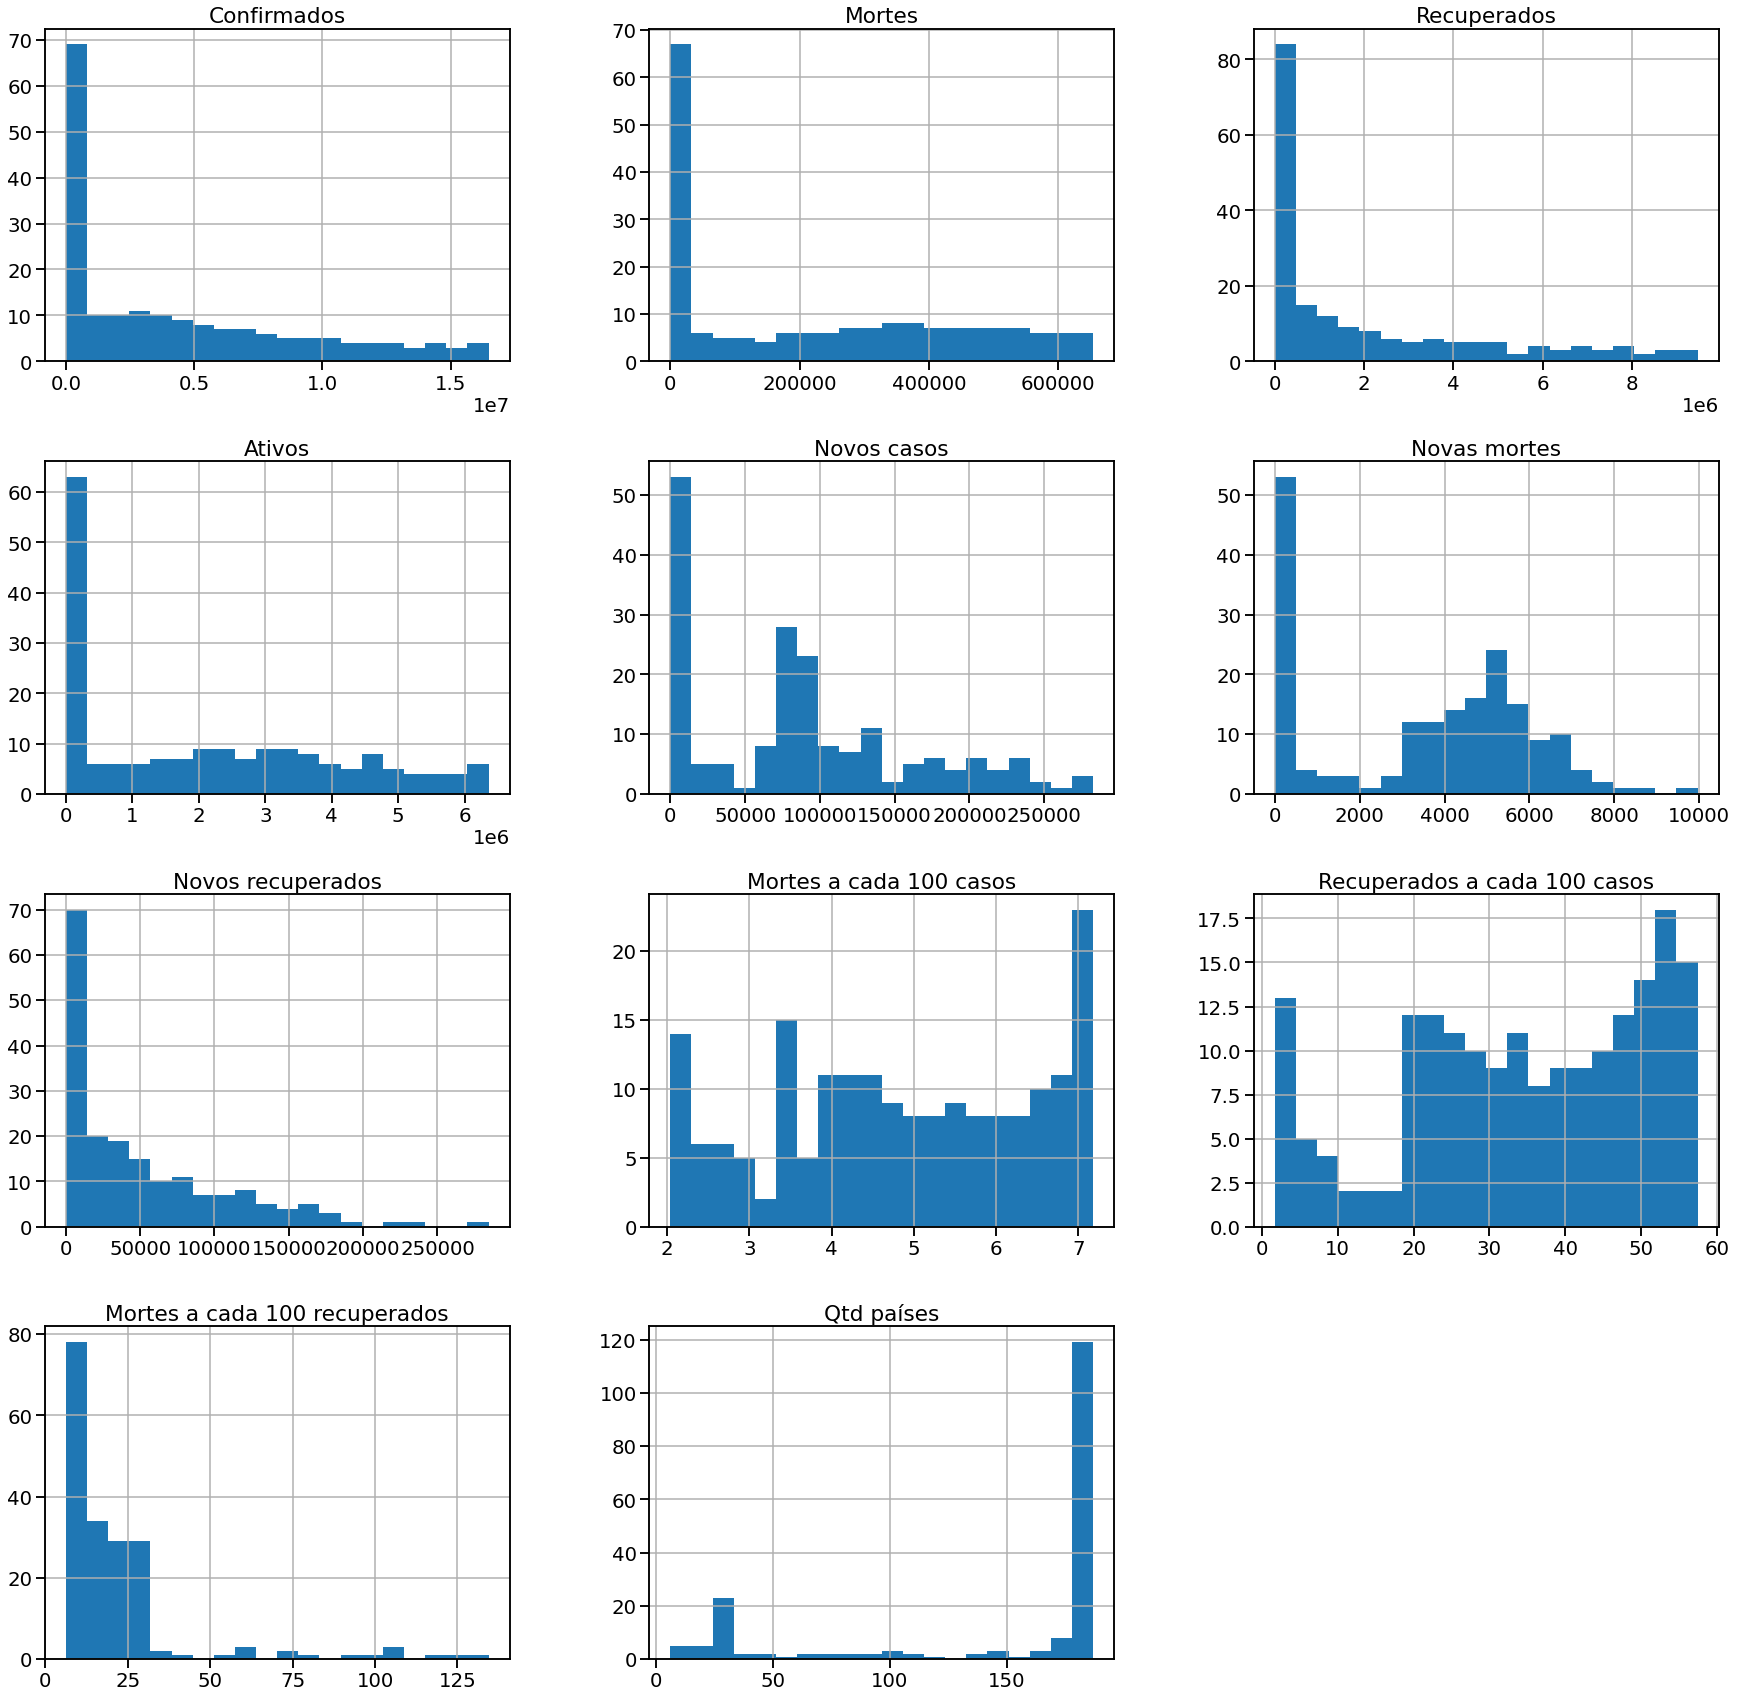

In [ ]:
df.hist(bins=20, figsize=(30,30));


Os histogramas não apresentam nenhuma característica anormal, valendo ressaltar que os histogramas de Recuperados, Ativos e Confirmados estão sendo medidos em notação científica. Confirmados, por exemplo, apresenta o valor máximo acima de 1.5, no canto inferior direito do histograma percebe-se um "1e7"; o que significa que os números do eixo X estão sendo multiplicados por 10⁷, ou seja, são números maiores que dez milhões(10000000). Vamos comparar com o maior valor do *data frame* de Confirmados, que nesse caso é a última linha 

In [ ]:
df.tail(1)

,Data,Confirmados,Mortes,Recuperados,Ativos,Novos casos,Novas mortes,Novos recuperados,Mortes a cada 100 casos,Recuperados a cada 100 casos,100 Mortes a cada recuperado,Qtd países
187,2020-07-27,16480485,654036,9468087,6358362,228693,5415,174623,3.97,57.45,6.91,187


Nota-se que apresenta um número maior que dezesseis milhões(16000000), logo a visualização está condizente.

### **3-Preparação de Dados**

A coluna "Mortes a cada 100 recuperados" na verdade está errada; na linha 0 o cálculo seria:<br>
 17(Mortes) / 28*100( Recuperados * 100) = 0.0060; o que difere da tabela. Em investigação mais profunda, reparei que o cálculo correto seria : <br>
 17 * 100 / 28 = 60.71
 <br><br>
 Então renomearemos a coluna de acordo

In [ ]:
df = df.rename(columns={"Mortes a cada 100 recuperados":"100 Mortes a cada recuperado"})
df.head(5)

,Data,Confirmados,Mortes,Recuperados,Ativos,Novos casos,Novas mortes,Novos recuperados,Mortes a cada 100 casos,Recuperados a cada 100 casos,100 Mortes a cada recuperado,Qtd países
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


Agora veremos as correlações entre as variáveis no código abaixo.

In [ ]:
plt.figure(figsize=(10,5))
corr = df[['Data', 'Confirmados', 'Mortes', 'Recuperados', 'Ativos', 'Novos casos','Novas mortes','Novos recuperados','Mortes a cada 100 casos','Recuperados a cada 100 casos','100 Mortes a cada recuperado','Qtd países']].corr()

display(corr)

,Confirmados,Mortes,Recuperados,Ativos,Novos casos,Novas mortes,Novos recuperados,Mortes a cada 100 casos,Recuperados a cada 100 casos,100 Mortes a cada recuperado,Qtd países
Confirmados,1.000000,0.975981,0.990165,0.986543,0.961473,0.555479,0.944875,0.221469,0.720283,-0.400336,0.595890
Mortes,0.975981,1.000000,0.936940,0.996879,0.952450,0.625537,0.923130,0.383897,0.715555,-0.410470,0.683543
Recuperados,0.990165,0.936940,1.000000,0.953981,0.936576,0.476217,0.935754,0.096131,0.711328,-0.382937,0.510129
Ativos,0.986543,0.996879,0.953981,1.000000,0.967578,0.637241,0.931824,0.364250,0.711695,-0.410725,0.683194
Novos casos,0.961473,0.952450,0.936576,0.967578,1.000000,0.721846,0.928570,0.367629,0.670914,-0.405802,0.722150
Novas mortes,0.555479,0.625537,0.476217,0.637241,0.721846,1.000000,0.555759,0.774790,0.328203,-0.271905,0.835157
Novos recuperados,0.944875,0.923130,0.935754,0.931824,0.928570,0.555759,1.000000,0.215238,0.684925,-0.383327,0.570745
Mortes a cada 100 casos,0.221469,0.383897,0.096131,0.364250,0.367629,0.774790,0.215238,1.000000,0.241877,-0.282469,0.823181
Recuperados a cada 100 casos,0.720283,0.715555,0.711328,0.711695,0.670914,0.328203,0.684925,0.241877,1.000000,-0.750625,0.581216
100 Mortes a cada recuperado,-0.400336,-0.410470,-0.382937,-0.410725,-0.405802,-0.271905,-0.383327,-0.282469,-0.750625,1.000000,-0.502025


<Figure size 720x360 with 0 Axes>

Quanto mais próximo de -1 ou 1 uma correlação (como as apresentadas acima) são, mais forte a correlação entre as duas variáveis. Temos muitas destas nessa análise, Confirmados tem um resultado de correlação acima de 0.9 com 5 variáveis diferentes por exemplo. Abaixo um Mapa de Calor para melhor visualização.<br><br>
Um detalhe que vale ressaltar são as correlações da variável "100 mortes a cada recuperado"; que tem todas as suas correlações negativas exceto com si mesma. <br><br>Isso se dá pelo erro de cálculo previamente citado, o qual nos fez trocar o nome da coluna.

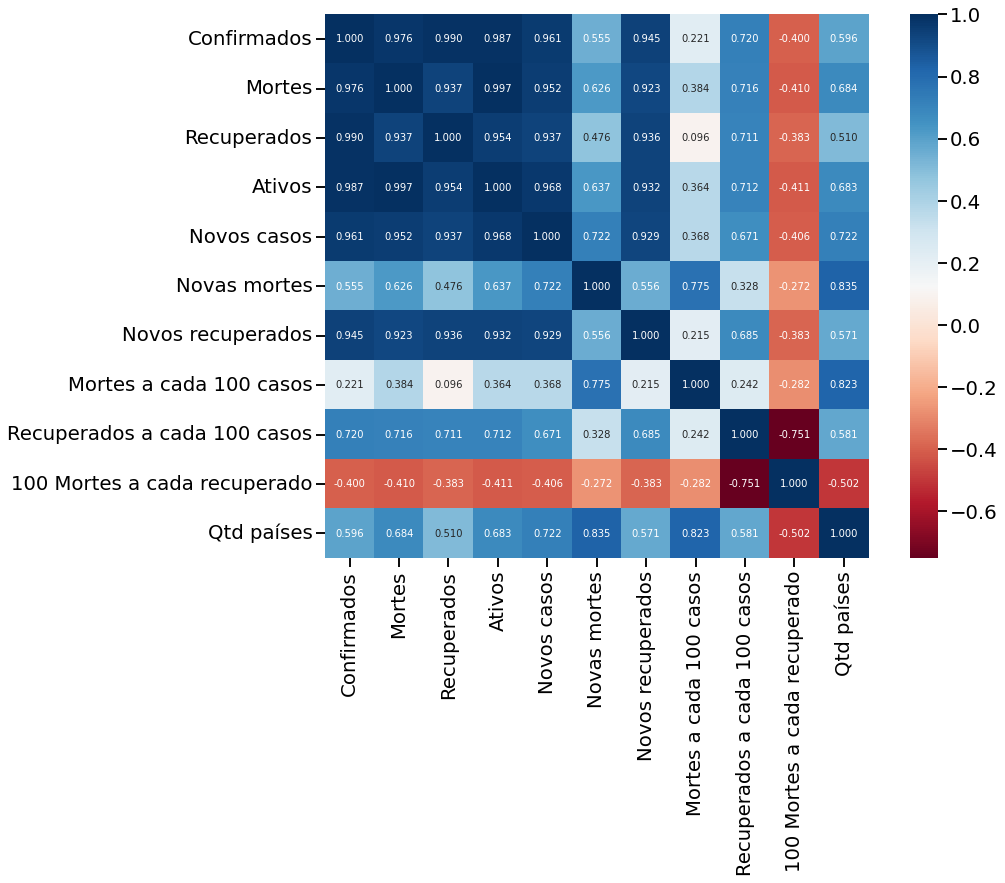

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap='RdBu', fmt='.3f', square=True, linecolor='white', annot=True);

### **4-Construção de Modelos**

Nesta etapa serão selecionadas técnicas de modelagem em Data Science, gerando um design de teste, construindo possíveis modelos para DS como modelos de machine learning, deep learning, inteligência artificial, análise exploratório de dados (tabelas, gráficos, BI), dentre outras técnicas disponíveis, e por fim, o modelo será avaliado quanto à qualidade das suas previsões (métricas de avaliação do modelo).

### **Análise Exploratória de Dados: Problemas investigados no Projeto**
<br>




*   A partir de que dia todos os países foram afetados pelo Covid-19?
*  Maior crescimento de casos de um dia para o outro
*  Qual o maior número de mortes registradas?
*  Qual a média de mortes por dia?



In [ ]:
df.head(188)

,Data,Confirmados,Mortes,Recuperados,Ativos,Novos casos,Novas mortes,Novos recuperados,Mortes a cada 100 casos,Recuperados a cada 100 casos,100 Mortes a cada recuperado,Qtd países
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13
...,...,...,...,...,...,...,...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187


*  A data em que todos os 187 países foram infectados foi  **2020/05/13**

In [ ]:
df[['Confirmados', 'Mortes', 'Recuperados', 'Ativos',
    'Novos casos', 'Novas mortes' , 'Novos recuperados','Mortes a cada 100 casos','Recuperados a cada 100 casos','100 Mortes a cada recuperado','Qtd países']].describe()

,Confirmados,Mortes,Recuperados,Ativos,Novos casos,Novas mortes,Novos recuperados,Mortes a cada 100 casos,Recuperados a cada 100 casos,100 Mortes a cada recuperado,Qtd países
count,1.880000e+02,188.000000,1.880000e+02,1.880000e+02,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,4.406960e+06,230770.760638,2.066001e+06,2.110188e+06,87771.021277,3478.824468,50362.015957,4.860638,34.343936,22.104521,144.351064
std,4.757988e+06,217929.094183,2.627976e+06,1.969670e+06,75295.293255,2537.735652,56090.892479,1.579541,16.206159,22.568307,65.175979
min,5.550000e+02,17.000000,2.800000e+01,5.100000e+02,0.000000,0.000000,0.000000,2.040000,1.710000,6.260000,6.000000
25%,1.121910e+05,3935.000000,6.044125e+04,5.864175e+04,5568.500000,250.750000,2488.250000,3.510000,22.785000,9.650000,101.250000
50%,2.848733e+06,204190.000000,7.847840e+05,1.859759e+06,81114.000000,4116.000000,30991.500000,4.850000,35.680000,15.380000,184.000000
75%,7.422046e+06,418634.500000,3.416396e+06,3.587015e+06,131502.500000,5346.000000,79706.250000,6.297500,48.945000,25.342500,187.000000
max,1.648048e+07,654036.000000,9.468087e+06,6.358362e+06,282756.000000,9966.000000,284394.000000,7.180000,57.450000,134.430000,187.000000


*  O maior crescimento de casos de um dia para outro foi de 282756 casos confirmados.
*  O maior número de mortes registrada é de 654036, no último dia registrado.
*  A média de mortes por dia é de 230770 pessoas.

### **5- Avaliando os Resultados do Projeto de DS:** 

Nesta etapa, você formaliza sua avaliação sobre se os resultados do projeto atendem ou não os critérios de sucesso dos negócios. E de acordo com os resultados apresentados nas fases anteriores, **fica claro que os 4 objetivos predeterminados na etapa de entendimento do negócio foram plenamente alcançados pela equipe do projeto**. Pode-se considerar que o projeto atendeu ao seu escopo, cronograma e qualidade do produto final entregue ao contratante.

### **6- Implementação:** 

Nesta etapa, buscamos atender a dois objetivos: o planejamento e monitoramento da implementação de resultados, bem como a conclusão de tarefas de finalização, tais como a produção de um relatório final e a realização de uma revisão do projeto. No caso em tela, produzimos o presente relatório final de entrega do projeto e de forma concomitante buscou-se realizar uma revisão dos principais pontos do projeto, passando-se pelas 6 (seis) etapas da metodologia CRISP-DM.



## **Conclusões**

O presente projeto tratou de uma análise exploratória de dados (EDA) das pessoas impactadas pelo Covid-19 na duração de 22 de Janeiro de 2020 até 27 de Julho do mesmo ano.

Na condução do projeto optou-se pela adoção da metodologia CRISP-DM composta por suas 6 (seis) etapas. Inicialmente, na etapa de **entendimento do negócio**, buscou-se definir 5 objetivos a serem alcançados ao fim do projeto como métrica de averificação de sucesso. Na sequência, na fase de **entendimento dos dados**, houve uma forte preocupacão no estudo dos dados, com especial atenção para conhecermos seu formato, tipos de variáveis,identificação de dados faltantes,bem como uma análise de correlacão entre as variáveis do dataset; houve também a tradução das colunas para português para mais fácil interpretação e a produção de histogramas.<br>Na etapa posterior, de **prepração dos dados**,trocamos o nome da coluna de "Mortes a cada 100 recuperados" para "100 Mortes a cada recuperado", vide que os resultados presentes no *data frame* não estavam condizendo com o nome prévio.<br>
Já na etapa de **modelagem** foram trabalhadas as  4(quatro) questões de interesse do projeto.Logo em seguida, na **avaliação** do projeto foi possível constatar o sucesso do mesmo, por meio do alcance dos objetivos previamente definidos e por fim, na fase de **implementação** foram feitas reflexões sobre a fase de implementação do projeto em produção.

**Resultados:**

*  A data em que todos os 187 países foram infectados foi  **2020/05/13**
*  O maior crescimento de casos de um dia para outro foi de 282756 casos confirmados.
*  O maior número de mortes registrada é de 654036, no último dia registrado.
*  A média de mortes por dia é de 230770 pessoas.
*  O de uma coluna prévia foi adaptada para "100 mortes a cada recuperado", em via de erros de cálculo presentes no *Data Frame*


De uma forma geral, valores bastante consistentes com a **baseline do projeto** estabelecida no item 1.<br>
Por fim, lembra-se que o presente dataset é uma versão resumida, ideal apenas para uma abordagem inicial do problema.



### **Referências**

*  Arquivo day_wise.csv
*  Endereço da imagem: https://www.remediosimportados.com.br/images/remedios-importados/healthcare.png